In [2]:
# import
import pandas as pd
import numpy as np

import datetime 
from datetime import datetime, date

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# matplotlib 한글설정
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# GROUPBY

In [4]:
sensor_data = pd.read_csv('./Learning-Pandas-Second-Edition-master/data/sensors.csv')
sensor_data.head()

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [7]:
gpby_sensor = sensor_data.groupby('sensor')
gpby_sensor

In [8]:
# groupby한 dataframe의 그룹갯수를 확인하는 속성
gpby_sensor.ngroups

2

In [9]:
# groupby한 dataframe의 그룹을 확인하는 속성
gpby_sensor.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64')}

In [10]:
for name, group in gpby_sensor:
    print(name)
    print(group[:5])

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [11]:
gpby_sensor.get_group('accel')

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
5,1,accel,X,0.9
6,2,accel,Z,0.2
7,2,accel,Y,0.3
8,2,accel,X,0.8
9,3,accel,Z,0.3


In [12]:
gpby_sensor.get_group('orientation')

,interval,sensor,axis,reading
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0
15,1,orientation,Z,0.0
16,1,orientation,Y,0.2
17,1,orientation,X,0.1
18,2,orientation,Z,0.0
19,2,orientation,Y,0.3
20,2,orientation,X,0.2
21,3,orientation,Z,0.0


In [14]:
def print_groups(groupby_obj):
    for name, group in groupby_obj:
        print(name)
        print(group[:5])
# main
print_groups(gpby_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [15]:
# 그룹별 갯수
gpby_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [16]:
# 그룹별 각 컬럼의 갯수
gpby_sensor.count()

,interval,axis,reading
sensor,,,
accel,12,12,12
orientation,12,12,12


In [18]:
# head() 각 그룹별로 default개씩 가져온다
gpby_sensor.head(3)

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0


In [19]:
# 각 그룹의 n번째 인덱스값 얻어온다
gpby_sensor.nth(7)

,interval,axis,reading
sensor,,,
accel,2,Y,0.3
orientation,2,Y,0.3


In [20]:
# 그룹별로 요약정보를 가져온다
gpby_sensor.describe()

interval                                           reading  \
               count mean       std  min   25%  50%   75%  max   count   
sensor                                                                   
accel           12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   
orientation     12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   

                                                             
                 mean       std  min  25%   50%    75%  max  
sensor                                                       
accel        0.450000  0.328910  0.0  0.2  0.35  0.725  1.0  
orientation  0.133333  0.143548  0.0  0.0  0.10  0.225  0.4

### multi groupby

In [21]:
sensor_data.head()

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [22]:
mcg = sensor_data.groupby(['sensor', 'axis'])

In [23]:
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [27]:
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
            X            1      0.9
            Z            2      0.2
            Y            2      0.3
            X            2      0.8
            Z            3      0.3
            Y            3      0.2
            X            3      0.7
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
            X            1      0.1
            Z            2      0.0
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

In [28]:
# multi index의 level사용
mi.groupby(level=0)

In [29]:
print_groups(mi.groupby(level=0))

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


In [31]:
print_groups(mi.groupby(level=['sensor','axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

### aggregation

In [32]:
# mi.groupby(level=['sensor','axis']).reading.mean()
sens_ax_gp = mi.groupby(level=['sensor','axis'])
sens_ax_gp.agg(np.mean)

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [34]:
# asindex로 그룹바이하면서 인덱스를 해제하고 새로 인덱스를 설정함
sensor_data.groupby(['sensor', 'axis'], as_index=False).agg(np.mean)

,sensor,axis,interval,reading
0,accel,X,1.5,0.85
1,accel,Y,1.5,0.35
2,accel,Z,1.5,0.15
3,orientation,X,1.5,0.15
4,orientation,Y,1.5,0.25
5,orientation,Z,1.5,0.00


In [36]:
# agg()함수로 한번에 여러 함수를 적용할 수 있다
# sens_ax_gp.mean() vs
sens_ax_gp.agg([np.mean, np.std])

interval           reading          
                     mean       std    mean       std
sensor      axis                                     
accel       X         1.5  1.290994    0.85  0.129099
            Y         1.5  1.290994    0.35  0.129099
            Z         1.5  1.290994    0.15  0.129099
orientation X         1.5  1.290994    0.15  0.129099
            Y         1.5  1.290994    0.25  0.129099
            Z         1.5  1.290994    0.00  0.000000

In [37]:
#컬럼별로 다른 함수를 적용할 수 있다
sens_ax_gp.agg({'interval':len, 'reading':np.mean})

interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

### transform

In [41]:
transform_data = pd.DataFrame({'Label':list('ACBAC'),'Values':[0,1,2,3,4], 'Values2':[5,6,7,8,9], 'Other':['foo', 'bar', 'baz', 'fiz', 'buz'] }, index=list('VWXYZ'))
transform_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


In [43]:
#group by label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [44]:
grouped_by_label.transform(lambda x:x+10)

,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


In [54]:
grouped_by_label.transform(lambda x:x)

,Values,Values2,Other
V,0,5,foo
W,1,6,bar
X,2,7,baz
Y,3,8,fiz
Z,4,9,buz


In [52]:
grouped_by_label.transform(lambda x:x.mean())

,Values,Values2
V,1.5,6.5
W,2.5,7.5
X,2.0,7.0
Y,1.5,6.5
Z,2.5,7.5


In [53]:
grouped_by_label.transform(lambda x:x+x.mean())

,Values,Values2
V,1.5,11.5
W,3.5,13.5
X,4.0,14.0
Y,4.5,14.5
Z,6.5,16.5


In [57]:
df = pd.DataFrame({'Label':list('ABABAB'), 'Values':[10,20,11,np.nan,12,22]})
gp = df.groupby('Label')

In [58]:
print_groups(gp)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [59]:
gp.agg(np.mean)

,Values
Label,
A,11.0
B,21.0


In [60]:
gp.mean()

,Values
Label,
A,11.0
B,21.0


In [62]:
filled = gp.transform(lambda x: x.fillna(x.mean()))
filled

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


In [63]:
np.random.seed(1234)
data = pd.Series(np.random.normal(0.5,5,365*3), pd.date_range('2013-01-01', periods=365*3))
data

2013-01-01    2.857176
2013-01-02   -5.454878
2013-01-03    7.663535
2013-01-04   -1.063259
2013-01-05   -3.102944
                ...   
2015-12-27   -1.324775
2015-12-28   -1.586423
2015-12-29   -1.126032
2015-12-30    2.076795
2015-12-31    0.609973
Freq: D, Length: 1095, dtype: float64

In [65]:
periods = 100
rolling = data.rolling(window=periods, min_periods=periods, center=False).mean().dropna()
rolling[:5]

2013-04-10    0.675561
2013-04-11    0.666550
2013-04-12    0.754425
2013-04-13    0.707970
2013-04-14    0.737867
Freq: D, dtype: float64

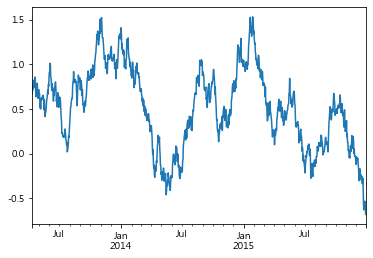

In [66]:
rolling.plot()

In [67]:
group_key = lambda x: x.year
gps = rolling.groupby(group_key)
gps.agg([np.mean, np.std])

,mean,std
2013,0.790287,0.312183
2014,0.471039,0.453627
2015,0.364853,0.438299


In [69]:
z_score = lambda x: (x-x.mean())/x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed

2013-04-10   -0.367494
2013-04-11   -0.396360
2013-04-12   -0.114873
2013-04-13   -0.263682
2013-04-14   -0.167914
                ...   
2015-12-27   -2.141404
2015-12-28   -2.263869
2015-12-29   -2.386697
2015-12-30   -2.137148
2015-12-31   -2.071180
Freq: D, Length: 996, dtype: float64

In [71]:
normed.groupby(group_key).agg([np.mean, np.std])

,mean,std
2013,2.395744e-16,1.0
2014,8.760116e-17,1.0
2015,1.679022e-16,1.0


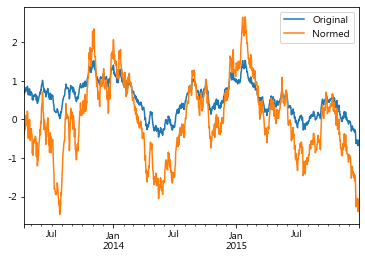

In [75]:
compared = pd.DataFrame({'Original':rolling, 'Normed':normed})
compared.plot()

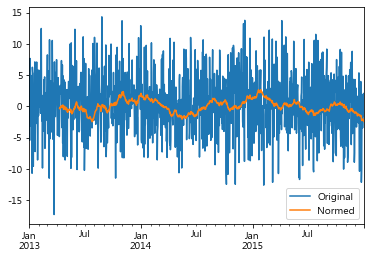

In [76]:
data
compared2 = pd.DataFrame({'Original':data, 'Normed':normed})
compared2.plot()

### filtering
###### agg
###### transform
###### filter

In [77]:
df = pd.DataFrame({'Label': list('AABCCC'), 'Values':[1,2,3,4,np.nan, 8] })
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [80]:
# values값이 1개 이하인 그룹을 거르기
f = lambda x: x.Values.count()>1
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


In [81]:
# null값이 하나라도 있는 그룹을 거르기
f = lambda x: x.Values.isnull().sum()==0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


In [82]:
gped =  df.groupby('Label')
gped.mean()

,Values
Label,
A,1.5
B,3.0
C,6.0


In [88]:
gpmean =  gped.mean().mean()
gpmean

Values    3.5
dtype: float64

In [89]:
gped.mean()

,Values
Label,
A,1.5
B,3.0
C,6.0


In [90]:
f = lambda x: abs(x.Values.mean()-gpmean)>2
df.groupby('Label').filter(f)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0
